# Importing Libraries and setting paths

Mount the HDD (in files), else no image can be accessed 

In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="3"
from stardist.models import StarDist2D 
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
import cv2
import numpy as np

from glob import glob
import pandas as pd

# creates a pretrained model (one for mIF and one for H&E)
m1 = StarDist2D.from_pretrained('2D_versatile_fluo')
m2 = StarDist2D.from_pretrained('2D_versatile_he')

#Path to store
pth_main="/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct/"


#CD3 and DAPI mIF single channel images (Images are the same for serial and same section)
cd3_images=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/Raw_Data/Images_Raw_Data/Core_Raw_Images_Same_Section/l*/cd3/*"))
dapi_images=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/Raw_Data/Images_Raw_Data//Core_Raw_Images_Same_Section/l*/dapi/*"))

#H&E raw images
he_images=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/Raw_Data/Lung_square_serial_Before/*"))


#he_deconv_imgs=sorted(glob("/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/fluo_trial1/he_fluo/*"))
he_deconv_imgs=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/Raw_Data/Lung_square_serial_stain_deconv/*"))
#Blue_nuclei from k-means, optional
#blue_n_images=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479//Blue_Nuclei/*/b*"))

print(len(cd3_images))
print(len(dapi_images))
print(len(he_images))
print(len(he_deconv_imgs))
#print(len(blue_n_images))
if(len(cd3_images)==len(dapi_images) and len(cd3_images)==len(he_images)and len(he_deconv_imgs)==len(he_images)):
    print("**********All Good***********")
else:
    print("Number of images not equal")
#Useful pointers to start and stop processing, therefore indices will always be from y to z
y=0
#y=34
#z=34
z=len(cd3_images)



2022-11-15 10:16:28.075257: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Found model '2D_versatile_fluo' for 'StarDist2D'.


2022-11-15 10:16:30.390559: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-15 10:16:30.390950: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-15 10:16:30.458457: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0d:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-11-15 10:16:30.458488: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-15 10:16:30.474316: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-15 10:16:30.474358: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-1

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.
0
0
0
0
**********All Good***********


# Avoid running the next 5 cells

It takes a lot of time to detect nuclei

(Potential speed boosting possible)

In [2]:
#Function to detect nuclei, use m1 for mIF (to detect CD3 and DAPI postive cells/nuclei), m2 for H&E (to detect blue nuclei)
def fn(img,pth,m):
    

    if(m!=m2):
        i = cv2.imread(img,0)
    else:
        i = cv2.imread(img)
        i= cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    i=cv2.resize(i,(3328,3328))


    try:
        labels, a = m.predict_instances(normalize(i))
    except:
        print("Putting blank image")
        labels=np.zeros_like(i)


    plt.imsave(pf+"/"+pth+".png",labels,cmap="gray")

    print(pf+"/"+pth+".png")
        #Additional code to note data from stardist like cell number, size etc.
        #lst.append(len(np.unique(labels)))
        #df=pd.DataFrame(lst)
        #df.to_csv(imgs[0].split("/")[2]+".csv")
        

In [4]:
#Function to detect nuclei, use m1 for mIF (to detect CD3 and DAPI postive cells/nuclei), m2 for H&E (to detect blue nuclei)
def fn2(img,pth,m):
    

    if(m!=m2):
        i = cv2.imread(img,0)
    else:
        i = cv2.imread(img)
        i= cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    i=cv2.resize(i,(3328,3328))


    try:
        labels, a = m.predict_instances(normalize(i))
    except:
        print("Putting blank image")
        labels=np.zeros_like(i)


    np.save(pf+"/"+pth+".npy",labels)

    print(pf+"/"+pth+".npy")
        #Additional code to note data from stardist like cell number, size etc.
        #lst.append(len(np.unique(labels)))
        #df=pd.DataFrame(lst)
        #df.to_csv(imgs[0].split("/")[2]+".csv")
        

In [8]:
x=y
for c in he_images[y:y+z]:
    pf=pth_main+"/Before/"+f"{x:03d}"
    print(pf)
    fn2(c,"he_blue_nuclei",m2)
    x=x+1

/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/000
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/000/he_blue_nuclei.npy
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/001
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/001/he_blue_nuclei.npy
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/002
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/002/he_blue_nuclei.npy
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/003
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/003/he_blue_nuclei.npy
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/0

/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/036/he_blue_nuclei.npy
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/037
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/037/he_blue_nuclei.npy
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/038
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/038/he_blue_nuclei.npy
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/039
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/039/he_blue_nuclei.npy
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/040
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Serial_Slide/15thOct//Before/0

In [ ]:
x=y
# ---> Image 35 probably has no CD3 positive regions, the kernel breaks because of it, hence, current solution is to put
# ---> a blank image
for a,b,c in zip(cd3_images[y:y+z],dapi_images[y:y+z],he_images[y:y+z]):
    pf=pth_main+"/Before/"+f"{x:03d}"
    
    os.makedirs(pf,exist_ok=True)
    
    fn(b,"mif_dapi",m1)
    fn(c,"he_blue_nuclei",m2)
    fn(a,"mif_cd3",m1)
    x=x+1

2022-10-16 10:43:53.215424: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-16 10:43:53.231932: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699770000 Hz
2022-10-16 10:43:53.348440: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-10-16 10:43:54.183540: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct//Before/034/mif_dapi.png
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct//Before/034/he_blue_nuclei.png
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct//Before/034/mif_cd3.png
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct//Before/035/mif_dapi.png
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct//Before/035/he_blue_nuclei.png


In [7]:
dapi_images[36]

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/Raw_Data/Images_Raw_Data//Core_Raw_Images_Same_Section/lung_raw/dapi/048.png'

In [8]:
he_images[36]

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/Raw_Data/Lung_square_serial_Before/048.tif'

In [2]:
pf=pth_main+"/Before/"+f"{35:03d}" 
print(pf)
os.makedirs(pf,exist_ok=True)
null_image=np.zeros_like(cv2.imread(cd3_images[36],0))
plt.imsave(pf+"/"+"mif_cd3.png",null_image,cmap="gray")
#fn(dapi_images[36],"mif_dapi",m1)
#fn(he_images[36],"he_blue_nuclei",m2)

/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct//Before/035


# Start running here

In [3]:

pths_cd3_2=sorted(glob(pth_main+"Before/*/*cd3*"))
pths_dapi_2=sorted(glob(pth_main+"Before/*/*da*"))
pths_bn_2=sorted(glob(pth_main+"Before/*/he_bl*"))

## Re-checking images containing marked individual nuclei 

Should show 'all good'

In [4]:
print(len(pths_bn_2))
print(len(pths_dapi_2))
print(len(pths_cd3_2))
#print(len(blue_n_images))
if(len(pths_bn_2)==len(pths_cd3_2) and len(pths_cd3_2)==len(pths_dapi_2)):
    print("**********All Good***********")
else:
    print("Number of images not equal")

57
57
57
**********All Good***********


# Creating the "after" folder

## Followed by two sub-folders

### Direct overlap 
#### i.e. "clear" 
### one with gaussian blurring 
#### i.e. Gaussian blurring kernel

In [5]:
gaussian_blur_kernel=101

pth_main_2= pth_main+"After/"
os.makedirs(pth_main_2,exist_ok=True)

pth_main_3=pth_main_2+"clear/"
os.makedirs(pth_main_3,exist_ok=True)

pth_main_4=pth_main_2+"filtered_"+str(gaussian_blur_kernel)+"/"
os.makedirs(pth_main_4,exist_ok=True)

print(pth_main_2)
print(pth_main_3)
print(pth_main_4)

/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct/After/
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct/After/clear/
/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/15thOct/After/filtered_101/


In [10]:
x=y

for a,b,c,d in zip(pths_cd3_2[y:y+z],pths_dapi_2[y:y+z],pths_bn_2[y:y+z],he_deconv_imgs[y:y+z]):
    
    #Read mIF images in grayscale
    img_cd3=cv2.imread(a,0)
    img_dapi=cv2.imread(b,0)
    
    #Threshold images to get a binary mask
    
    r,t1=cv2.threshold(img_cd3,0,255,cv2.THRESH_BINARY)
    r,t2=cv2.threshold(img_dapi,0,255,cv2.THRESH_BINARY)
    
    #Bitwise overlap
    overlap=cv2.bitwise_and(t1,t2)
    
    #Dilate if necessary
    kernel = np.ones((15,15),np.uint8)
    dilate= cv2.dilate(overlap,kernel,iterations = 1)
    
    #Comment out this line if dilating
    #dilate=overlap
    
    #Store resulting image 
    
    cv2.imwrite(pth_main+"Before/"+f"{x:03d}"+"/mIF_overlap.png",dilate)
    
    #Read H&E Blue Nuclei Image 
    img_b_n=cv2.imread(c,0)
    #Resize if necessary
    #img_b_n=cv2.resize(img_b_n,(3328,3328))
    
    #Threshold image to get a binary mask
    r,t3=cv2.threshold(img_b_n,0,255,cv2.THRESH_BINARY)
    
    
    
    #Read H&E image
    img_he=cv2.imread(d)
    
    #To convert to rgb from bgr color scale
    #img_he=cv2.cvtColor(img_he,cv2.COLOR_BGR2RGB)
    #Resize if necessary
    img_he=cv2.resize(img_he,(3328,3328))
    b,g,_=cv2.split(img_he)
    
    #Overlap dilated CD3+DAPI overlap image with blue_nuclei
    m1=cv2.bitwise_and(b,dilate)
    m2=cv2.bitwise_and(m1,t3)
    r,cd3p=cv2.threshold(m2,0,255,cv2.THRESH_BINARY)
    
    #Store processed Image
    cv2.imwrite(pth_main+"Before/"+f"{x:03d}"+"/mIF_overlap_H&E.png",cd3p)
    
    #Apply Gaussian Blur
    cd3p_1=cv2.GaussianBlur(cd3p,(gaussian_blur_kernel,gaussian_blur_kernel),0)
    
    #To normalize after blurring, with a check to eliminiate fully CD3- regions
    
    if(np.max(cd3p_1)>50):
        cd3p_1=(cd3p_1-np.min(cd3p_1))/(np.max(cd3p_1)-np.min(cd3p_1))
        cd3p_1=cd3p_1*255
        cd3p_1=np.array(cd3p_1,np.uint8)
    

    
    #Storing a copy of H&E stain deconvoluted file in Pre-processed folder for easy access 
    cv2.imwrite(pth_main+"Before/"+f"{x:03d}"+"/he.png",img_he)
    
    im_final=cv2.merge([cd3p,g,b])
    plt.imsave(pth_main_3+"/"+f"{x:03d}"+".png",im_final) #Clear CD3+ regions folder images
    
    im_final_blur=cv2.merge([cd3p_1,g,b])
    plt.imsave(pth_main_4+"/"+f"{x:03d}"+".png",im_final_blur) #Blurred CD3+ regions

   
    
    print(x)
    x=x+1

36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


# Debugging

In [ ]:
    #cd3p=cv2.bitwise_and(t3,dilate)
    
    #kernel = np.ones((15,15),np.uint8)
    #cd3p=cv2.dilate(cd3p,kernel,iterations = 1)
    #cd3p_1=cv2.cvtColor(cd3p,cv2.COLOR_BGR2GRAY)

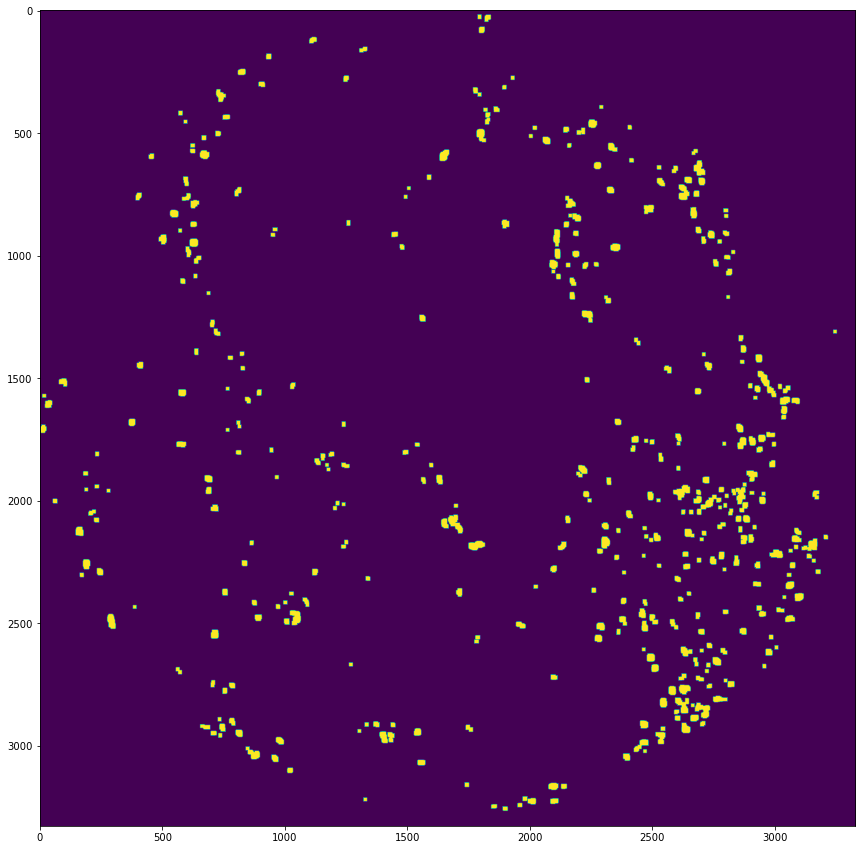

In [13]:
plt.figure(figsize=(15,15))
plt.imshow(dilate)

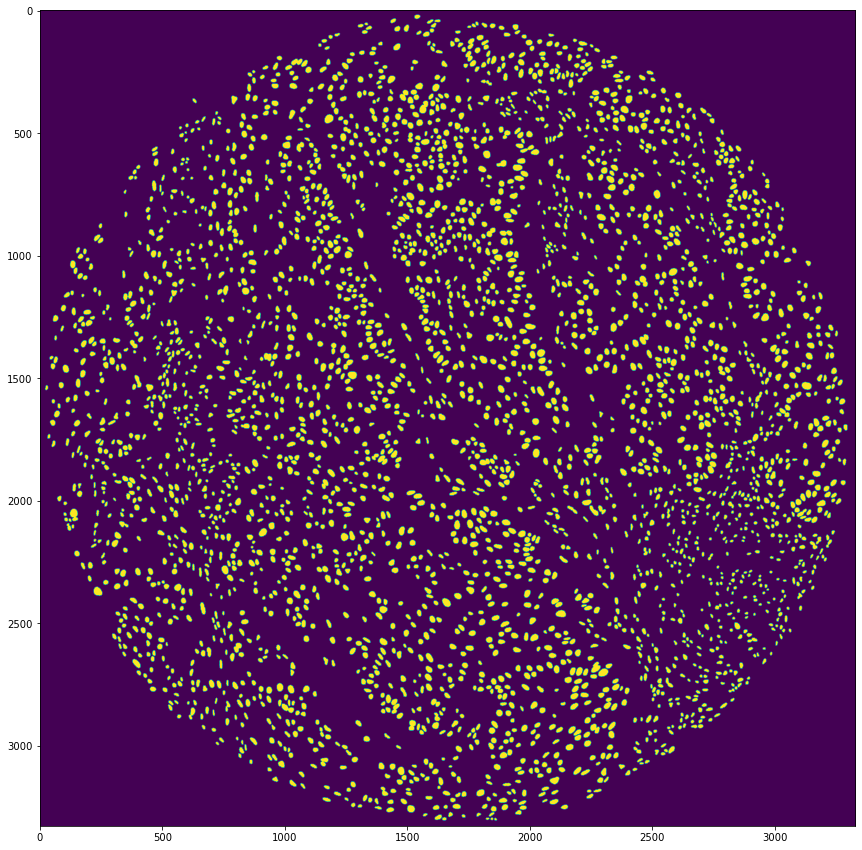

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(t3)

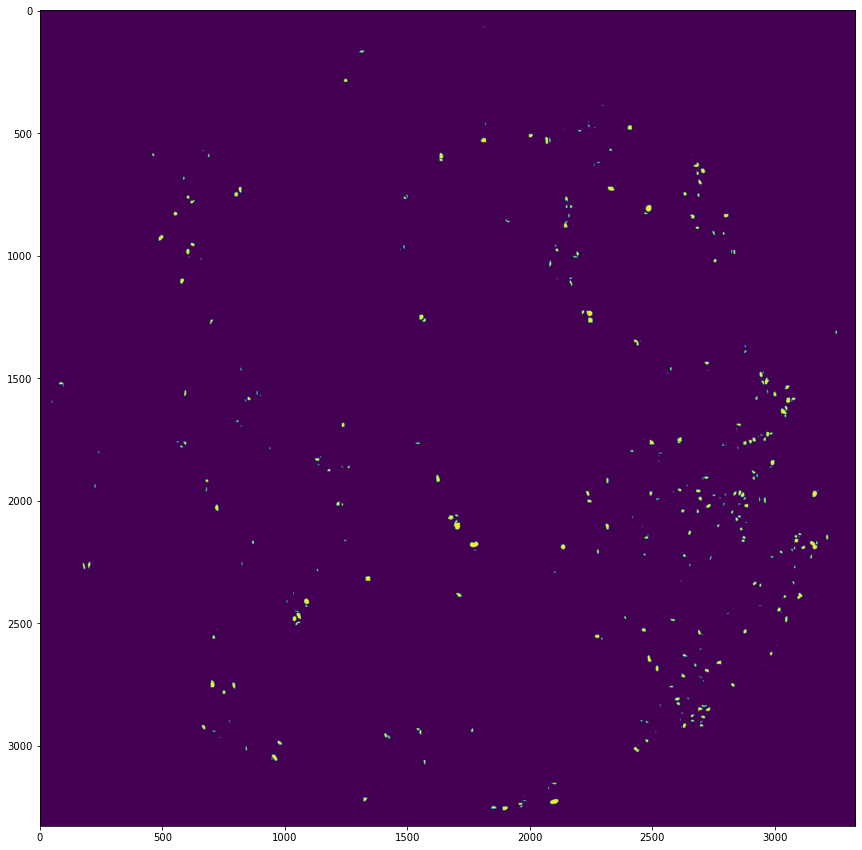

In [17]:
m1=cv2.bitwise_and(b,dilate)
m2=cv2.bitwise_and(m1,t3)
r,t=cv2.threshold(m2,0,255,cv2.THRESH_BINARY)
plt.figure(figsize=(15,15))
plt.imshow(t)

    #zeros=np.zeros(green.shape,np.uint8)
    
    
    #im2_final=cv2.bitwise_and(cd3p_2,cd3p_1_1)
    #mask=cv2.addWeighted(im2_final,1,img_he,1,0)
    #mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    #plt.imsave(pth_main_2+"/"+f"{x:03d}"+"/mask.png",mask)
    #plt.imsave(pth_main_3+"/"+f"{x:03d}"+".png",mask)
    #im3_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(11,11),0)
    #im3_final=cv2.medianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),25)
    #kernel = np.ones((15,15),np.uint8)
    #im3_final= cv2.dilate(im3_final,kernel,iterations = 1)
    #mask2=cv2.addWeighted(im3_final,1,img_he,1.2,0)
    #mask2=cv2.cvtColor(mask2,cv2.COLOR_BGR2RGB)

x=y
pth_main_2="/home/saab/Desktop/Processed_Data/Preprocessed_Data/Same_Slide/Stardist_27Jul/After/"
pth_main_5="/home/saab/Desktop/mask_2/"
os.makedirs(pth_main_2,exist_ok=True)
pth_main_3=pth_main_2+"/clear/"
os.makedirs(pth_main_3,exist_ok=True)
pth_main_4=pth_main_2+"/filtered_80_50_101_new/"
os.makedirs(pth_main_4,exist_ok=True)
os.makedirs(pth_main_5,exist_ok=True)
for a,b,c,d in zip(pths_cd3_2[y:y+z],pths_dapi_2[y:y+z],pths_bn_2[y:y+z],he_images[y:y+z]):
    img_cd3=cv2.imread(a,0)
    img_dapi=cv2.imread(b,0)
    img_b_n=cv2.imread(c)
    img_b_n=cv2.resize(img_b_n,(3328,3328))
    img_he=cv2.imread(d)
    img_he=cv2.resize(img_he,(3328,3328))
    cv2.imwrite(pth_main+"/"+f"{x:03d}"+"/he.png",img_he)
    r,t1=cv2.threshold(img_cd3,0,255,cv2.THRESH_BINARY)
    r,t2=cv2.threshold(img_dapi,0,255,cv2.THRESH_BINARY)
    overlap=cv2.bitwise_and(t1,t2)
    kernel = np.ones((15,15),np.uint8)
    dilate= cv2.dilate(overlap,kernel,iterations = 1)
    cv2.imwrite(pth_main+"/"+f"{x:03d}"+"/overlap.png",dilate)
    cd3p=cv2.bitwise_and(img_b_n,cv2.cvtColor(dilate,cv2.COLOR_GRAY2BGR))
    #kernel2 = np.ones((55,55),np.uint8)
    cd3p=cv2.dilate(cd3p,kernel,iterations = 1)
    cd3p_1=cv2.cvtColor(cd3p,cv2.COLOR_BGR2GRAY)
    cd3p_1_1=cv2.cvtColor(cd3p_1,cv2.COLOR_GRAY2BGR)
    green=np.ones(cd3p_1.shape,np.uint8)
    green=green*127
    zeros=np.zeros(green.shape,np.uint8)
    cd3p_2=cv2.merge([zeros,green,zeros])
    #im2_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(101,101),0)
    im2_final=cv2.bitwise_and(cd3p_2,cd3p_1_1)
    mask=cv2.addWeighted(im2_final,1,img_he,1,0)
    mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    #plt.imsave(pth_main_2+"/"+f"{x:03d}"+"/mask.png",mask)
    plt.imsave(pth_main_3+"/"+f"{x:03d}"+".png",mask)
    im3_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(101,101),0)
    plt.imsave(pth_main_5+"/"+f"{x:03d}"+".png",im3_final)
    mask2=cv2.addWeighted(im3_final,0.75,img_he,1,0)
    mask2=cv2.cvtColor(mask2,cv2.COLOR_BGR2RGB)
    plt.imsave(pth_main_4+"/"+f"{x:03d}"+".png",mask2)
    print(x)
    x=x+1

x=y
pth_main_2="/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/Stardist_27Jul/After/"
os.makedirs(pth_main_2,exist_ok=True)
pth_main_3=pth_main_2+"/clear/"
os.makedirs(pth_main_3,exist_ok=True)
pth_main_4=pth_main_2+"/filtered_70_120_101/"
os.makedirs(pth_main_4,exist_ok=True)
for a,b,c,d in zip(pths_cd3_2[y:y+z],pths_dapi_2[y:y+z],blue_n_images[y:y+z],he_images[y:y+z]):
    img_cd3=cv2.imread(a,0)
    img_dapi=cv2.imread(b,0)
    img_b_n=cv2.imread(c)
    img_b_n=cv2.resize(img_b_n,(3328,3328))
    img_he=cv2.imread(d)
    img_he=cv2.resize(img_he,(3328,3328))
    cv2.imwrite(pth_main+"/"+f"{x:03d}"+"/he.png",img_he)
    r,t1=cv2.threshold(img_cd3,0,255,cv2.THRESH_BINARY)
    r,t2=cv2.threshold(img_dapi,0,255,cv2.THRESH_BINARY)
    overlap=cv2.bitwise_and(t1,t2)
    kernel = np.ones((15,15),np.uint8)
    dilate= cv2.dilate(overlap,kernel,iterations = 1)
    cv2.imwrite(pth_main+"/"+f"{x:03d}"+"/overlap.png",dilate)
    cd3p=cv2.bitwise_and(img_b_n,cv2.cvtColor(dilate,cv2.COLOR_GRAY2BGR))
    #kernel2 = np.ones((55,55),np.uint8)
    cd3p=cv2.dilate(cd3p,kernel,iterations = 1)
    cd3p_1=cv2.cvtColor(cd3p,cv2.COLOR_BGR2GRAY)
    cd3p_1_1=cv2.cvtColor(cd3p_1,cv2.COLOR_GRAY2BGR)
    green=np.ones(cd3p_1.shape,np.uint8)
    green=green*255
    zeros=np.zeros(green.shape,np.uint8)
    cd3p_2=cv2.merge([zeros,green,zeros])
    #im2_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(101,101),0)
    im2_final=cv2.bitwise_and(cd3p_2,cd3p_1_1)
    mask=cv2.addWeighted(im2_final,0,img_he,1.2,0)
    mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    #plt.imsave(pth_main_2+"/"+f"{x:03d}"+"/mask.png",mask)
    plt.imsave(pth_main_3+"/"+f"{x:03d}"+".png",mask)
    im3_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(101,101),0)
    mask2=cv2.addWeighted(im3_final,0.6,img_he,1.2,0)
    mask2=cv2.cvtColor(mask2,cv2.COLOR_BGR2RGB)
    plt.imsave(pth_main_4+"/"+f"{x:03d}"+".png",mask2)
    print(x)
    x=x+1